In [1]:
# libraries
using Random
Random.seed!(3); # for reproducibility
using Plots
pyplot();

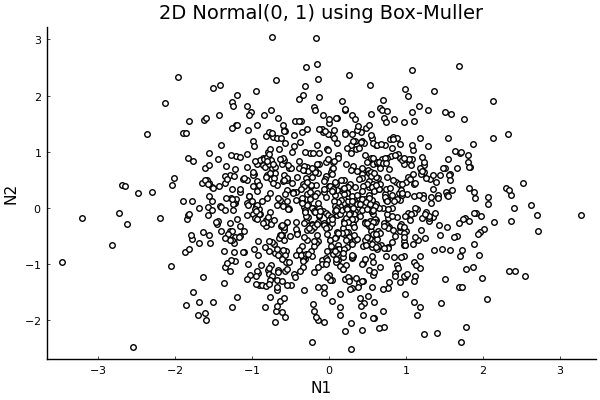

In [2]:
"""
Helper function that generates standard normal
random variables based on uniform seed. Seed 
input is assumed to have shape [N, 2]. 
"""
function box_muller(seed=rand(1000, 2))
    N = size(seed)[1]
    U1 = seed[:, 1]
    U2 = seed[:, 2]
    N1 = sqrt.(-2 * log.(U1)) .* cos.(2 * pi .* U2)
    N2 = sqrt.(-2 * log.(U1)) .* sin.(2 * pi .* U2)
    normal = zeros(N, 2)
    normal[:, 1] = N1
    normal[:, 2] = N2
    return(normal)
end

# check box muller is working
normal_numbers = box_muller()
layout = @layout [a            _
                  b{0.8w,0.8h} c]
default(fillcolor = :lightgrey, markercolor = :white, grid = false, legend = false)
plot(layout = layout, link = :both, size = (500, 500), margin = -10Plots.px)
plot(normal_numbers[:, 1], normal_numbers[:, 2], seriestype = :scatter, 
   xlabel="N1", ylabel="N2", title="2D Normal(0, 1) using Box-Muller")

Now we have the desired covariance matrix $C$, we can compute the matrix $S$ such that $C = S^TS$ for our linear transformation. We do so by Cholesky factorization.

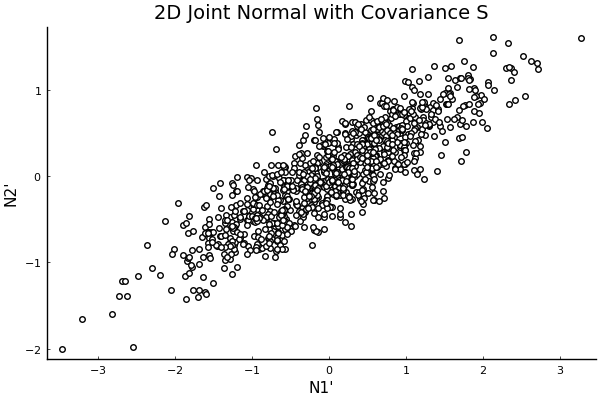

In [6]:
using LinearAlgebra
C = [1 1/2; 1/2 1/3];
S = cholesky(C).U;
# transform normal(0,1)
Y = transpose(transpose(S) * transpose(normal_numbers));
# plot new histogram
plot(Y[:, 1], Y[:, 2], seriestype = :scatter, 
   xlabel="N1'", ylabel="N2'", title="2D Joint Normal with Covariance S")

In [4]:
using Statistics
est_mean = mean(Y, dims = 1)

1×2 Matrix{Float64}:
 0.0402206  0.0298096

In [5]:
est_cov = cov(Y, dims = 1, corrected = true)

2×2 Matrix{Float64}:
 0.963013  0.479742
 0.479742  0.314302